## 11726 2xn 타일링
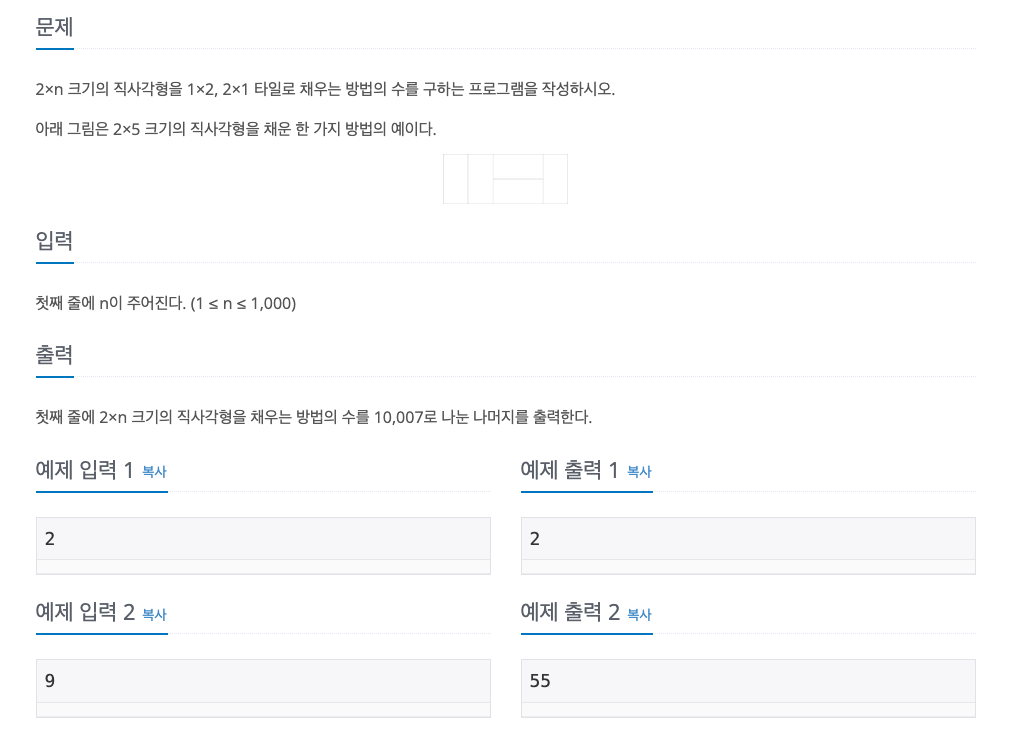
<br>
상상코딩: 점화식을 만들어야할거같은데 규칙을 찾아봐야겠다.

### 복습 풀이

In [73]:
n=int(input())
d=[1,2]+[0]*(n)
for i in range(2,n):
    d[i]=d[i-1]+d[i-2]
print(d[n-1]%10007)

9
55


#### 빠른 풀이

In [78]:
a,b=0,1
for i in range(int(input())):
    a,b=b,a+b
print(b%10007)

9
55


    문제: 2행 n열짜리 직사각형을 1행 2열, 2행 1열로 채우는 방법의수 구하기
    조건: 10007로 나눈 나머지를 출력

In [66]:
n=2 # 2x2

왜 피보나치지?

In [67]:
d=[1,2]

In [68]:
for i in range(2,n):
    d[i]=d[i-1]+d[i-2]

In [69]:
d

[1, 2]

In [70]:
print(d[n-1])

2


### 제출 풀이

In [31]:
n=int(input())
l=[1,2]
if n>2:
    for i in range(n-2):
        l.append(l[i]+l[i+1])
print(l[n-1]%10007)

9
55


### 다른 제출 풀이

In [ ]:
1 1 2 3 

In [35]:
n=int(input())
a=b=1
for i in range(n):
    a,b=b,a+b
print(a%10007)

9
55


### 짧고 재미있는 풀이

In [19]:
a=b=1
exec('a,b=b,a+b;'*int(input()))
print(a%10007)

[]

## 9095 1, 2, 3 더하기
문제: 테스트 케이스(T)개의 숫자가 주어졌을 때,<br>
1,2,3의 합으로 해당 수를 나타내는 경우의수를 개별 출력 (1+2 와 2+1은 순서가 달라, 다른 경우의수로 센다)<br>

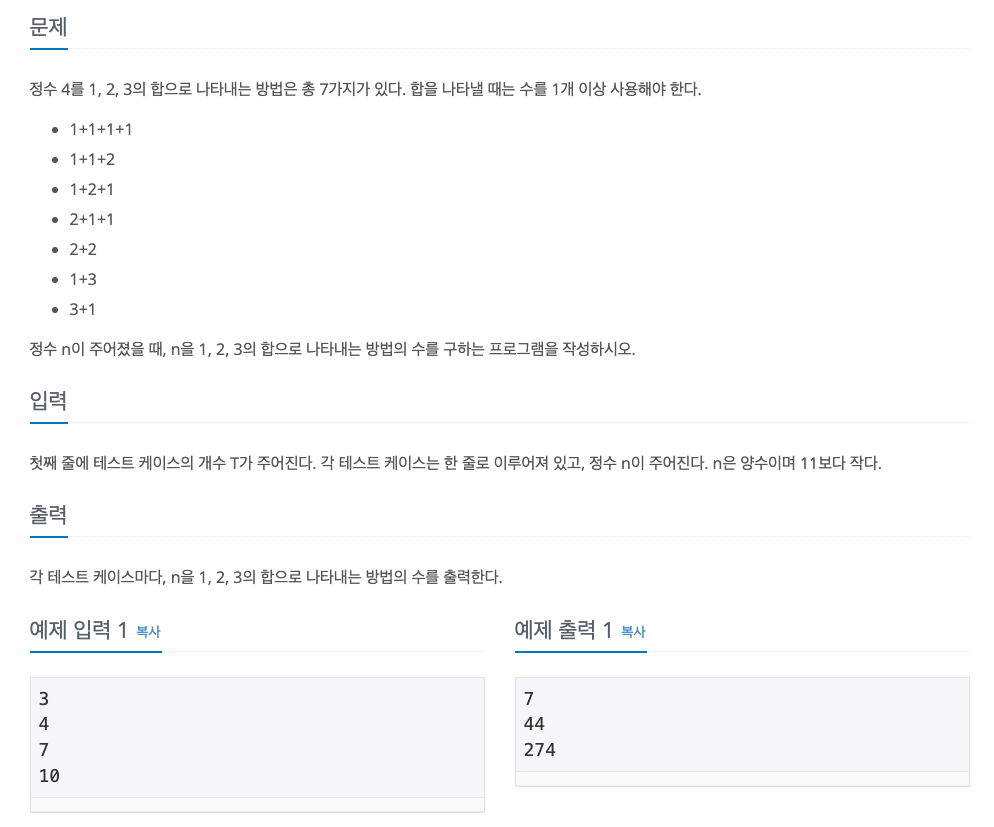


### 복습 풀이

In [ ]:
l=[int(input()) for _ in range(int(input()))]
T,M=len(l),max(l)
d=[0]*(M+1)
d[1],d[2],d[3]=1,2,4
for i in range(4,M+1):
    d[i]=sum(d[i-3:i])
for k in l:
    print(d[k])

In [46]:
l=[int(input()) for _ in range(int(input()))]

3
4
7
10


In [59]:
T,M=len(l),max(l)
d=[0]*(M+1)
T,M,d

(3, 10, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
d[1],d[2],d[3]=1,2,4

In [61]:
for i in range(4,M+1):
    d[i]=sum(d[i-3:i])

In [64]:
for k in l:
    print(d[k])

7
44
274


### 제출풀이

In [67]:
l=[1,2,4]
for i in range(7):
    l+=[sum(l[i:i+3])]

T=int(input())
for _ in range(T):
    n=int(input())
    print(l[n-1])

3
4
7
7
44
10
274


In [50]:
a,b,c=1,2,4
for i in range(n-3):
    a,b,c=b,c,a+b+c

In [64]:
l=[1,2,4]
for i in range(7):
    l+=[sum(l[i:i+3])]

### 숏코딩

In [76]:
for _ in range(int(input())): print([0,1,2,4,7,13,24,44,81,149,274][int(input())])

1
1
1


## 2293 동전 1
https://www.acmicpc.net/problem/2293

### 복습 풀이
    문제: n(동전 종류) k(가치의 합)이 주어진다. 그다음 n줄에 걸쳐 동전 가치가 주어지고, k원을 만드는데 사용되는 동전 경우의수를 구하시오.
    조건
    1. 각 동전 몇개라도 사용 가능
    2. 순서만 다른것은 같은 경우
    3. 동전은 10만 이하, k는 1만 이하

    막힌 부분: coin별로 range(coin,k+1)까지 i로 반복하며 dp[i]에 coin까지 사용해서 i원을 만드는 모든 경우의수를 저장하려고 한다. i가 coin으로 나누어 떨어지는 경우와 그렇지 않은 경우로 처음에 나누었고, 하다보니 예외케이스들이 생겨 예외들을 덕지덕지 추가하는데 계속 틀린 예외가 발생한다.
    -> 제일 안풀리는 부분은 coin이전의 경우의수와 현재 coin에서 경우의수를 합치는 부분이다. 예를 들어, 2, 4, 6원이 있을때 i가 8원이고, 4원까지 8원을 만드는 경우수는 3개(2222,42,44)이다. 이때 6원을 포함하면 (2222,42,44,62)로 4개가 되는데, dp[8-6]은 2이고 dp[8]은 3이다. 둘 중에 dp[8]에 1을 더하는 선택을 어떻게하지?
    
    해결한 부분: d[0]은 1로하고, coin에서 d[i]번째에 d[i]+d[i-c]로 지속 업데이트했더니 정답이 나왔다.

In [170]:
n,k=map(int,input().split())
l=[int(input()) for _ in range(n)]
l.sort()
d=[1]+[0]*(k)
for c in l:
    for i in range(c,k+1):
        d[i]=d[i]+d[i-c]
print(d[k])

3 9
2
4
6
0


In [181]:
n,k=3,8
l=[2,4,6] # return 4
d=[1]+[0]*(k)

In [183]:
n,k=3,10
l=[1,2,5] # return 10
d=[1]+[0]*(k)

In [185]:
n,k=1,5
l=[2] # return 10
d=[1]+[0]*(k)

In [186]:
for c in l:
    for i in range(c,k+1):
        d[i]=d[i]+d[i-c]
    print(c,d)

2 [1, 0, 1, 0, 1, 0]


### 연습

In [156]:
n,k=3,10
l=[1,2,5]
l.sort()
d=[1]+[0]*(k)
d

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [147]:
for c in l:
    for i in range(c,k+1):
        if i%c==0: #i원일 때, c원으로 나누어 떨어지면 +1   +   d[i-c]
            d[i]=d[i]+d[i-c]
        else:
            d[i]=d[i-c]+1
    print(c,d)        

1 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
2 [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6]
5 [1, 1, 2, 2, 3, 4, 2, 3, 3, 4, 10]


## 2294 동전 2
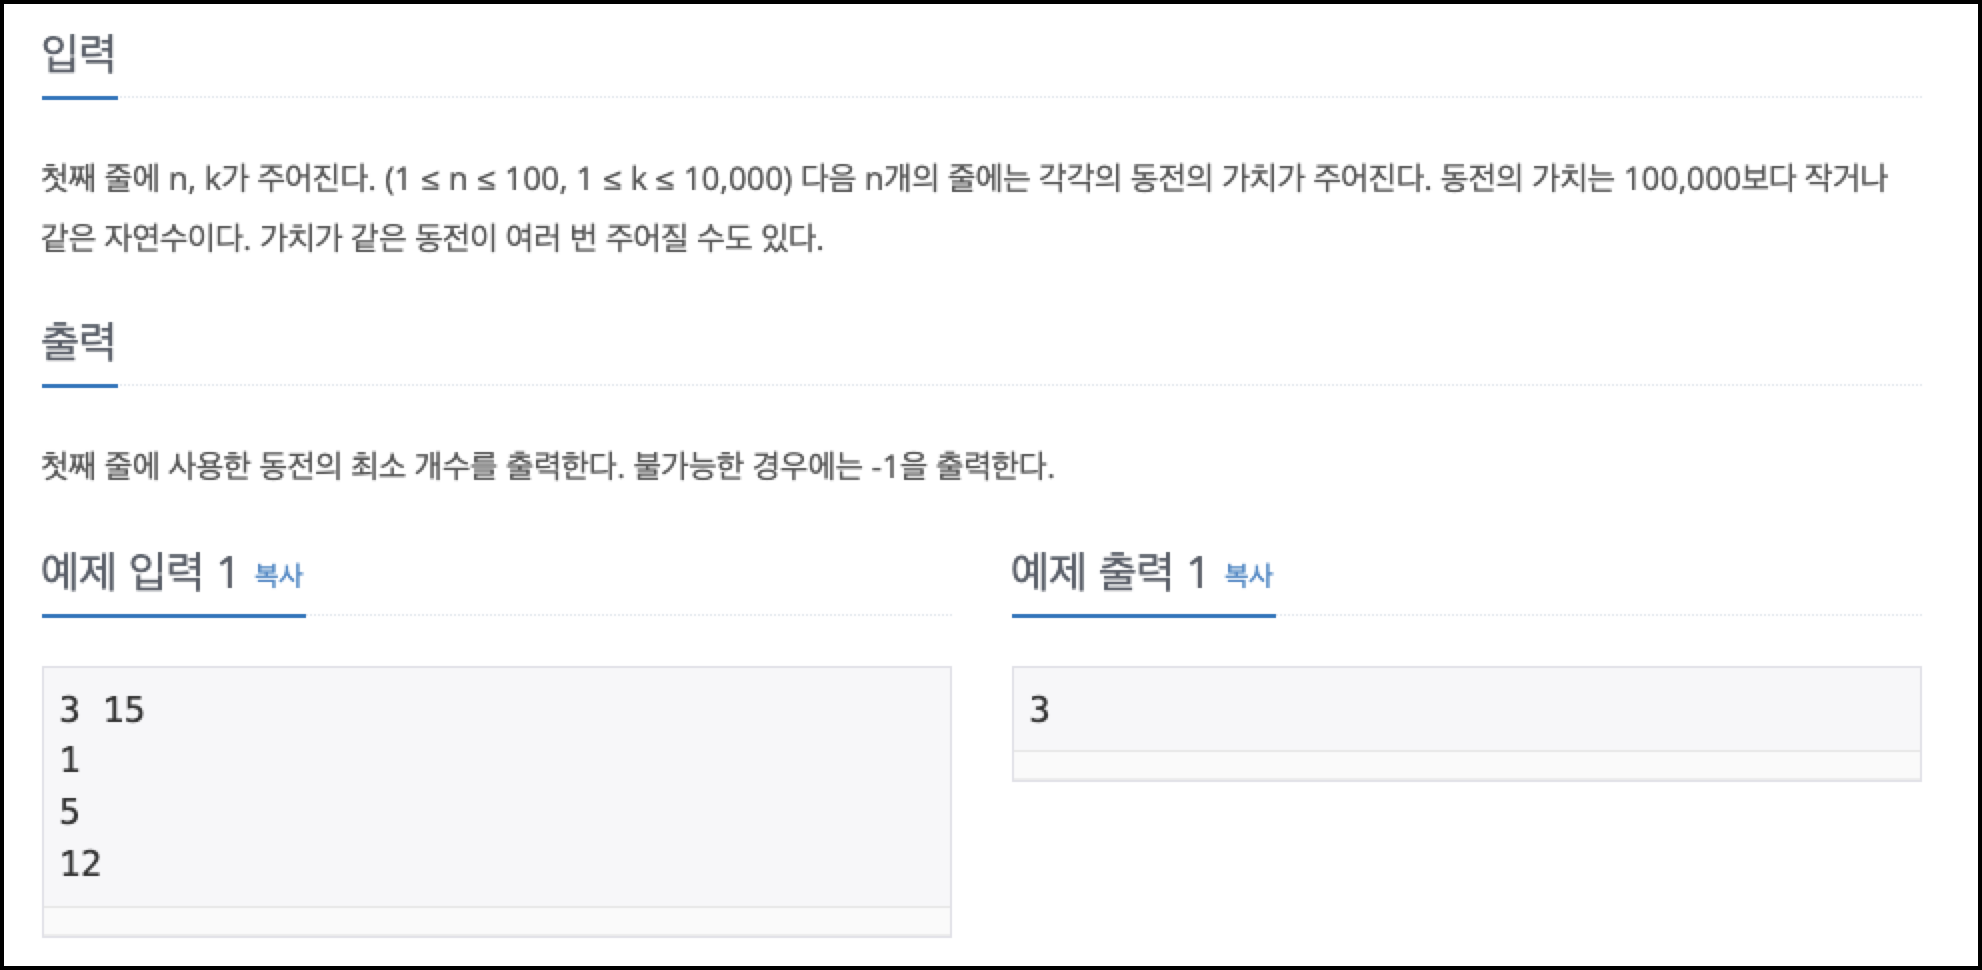

상상 코딩: dfs로 코인 나누어 떨어지면 코인 개수 세서 최소값 갱신. 
https://www.acmicpc.net/problem/2294

In [82]:
!

### 복습 풀이
    문제: n가지 종류의 동전주고 최소 개수 사용해서 k원 만드는 개수 출력. 동전은 몇개라도 사용할 수 있다.
    조건:
    1. 가치가 같은 동전이 여러 번 주어질 수도 있다.
    2. 불가능한 경우 -1 출력

In [88]:
n,k=map(int,input().split())
l=[int(input()) for _ in range(n)]
l.sort();M=9**9
d=[0] + [M]*(k)
for c in l:
    for i in range(c,k+1):
        d[i]=min(d[i],d[i-c]+1)
print(-1 if d[k]==M else d[k])

[1, 2, 3, 5, 8, 13, 21, 34, 55, 0, 0]

In [130]:
n,k=1,1
l=[3]
l.sort()
d=[0] + [9**9]*(k)
for c in l:
    for i in range(c,k+1):
        d[i]=min(d[i],d[i-c]+1)
print(-1 if d[k]==(9**9) else d[k])

-1


In [122]:
for c in l:
    for i in range(c,k+1):
        d[i]=min(d[i],d[i-c]+1)
    print(c,d)

1 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
5 [0, 1, 2, 3, 4, 1, 2, 3, 4, 5, 2, 3, 4, 5, 6, 3]
12 [0, 1, 2, 3, 4, 1, 2, 3, 4, 5, 2, 3, 1, 2, 3, 3]


### 제출 풀이

In [121]:
n,k=map(int,input().split())
coin_li=sorted([int(input()) for _ in range(n)])
dp=[10001]*(k+1)
dp[0]=0
for i in range(1,k+1):
    for c in coin_li:
        if i-c < 0:
            break
        else:
            dp[i] = min(dp[i-c]+1,dp[i])
print(-1 if dp[k]==10001 else dp[k])

3


In [115]:
n,k=map(int,input().split())
coin_li=sorted([int(input()) for _ in range(n)])

3 15
1
5
12


In [116]:
n,k,coin_li=(3, 15, [1, 5, 12])
n,k,coin_li

(3, 15, [1, 5, 12])

In [118]:
dp=[10001]*(k+1)
dp[0]=0

In [119]:
for i in range(1,k+1):
    for c in coin_li:
        if i-c < 0:
            break
        else:
            dp[i] = min(dp[i-c]+1,dp[i])

In [120]:
dp

[0, 1, 2, 3, 4, 1, 2, 3, 4, 5, 2, 3, 1, 2, 3, 3]

### 시간 초과 풀이

In [ ]:
import sys
input=sys.stdin.readline
n,k=map(int,input().split())
coin_li=[int(input()) for _ in range(n)]
result=10**9
def dp(k, cnt):
    global result
    if k<=0 or result<=cnt:
        return
    for c in coin_li:
        if k%c==0:
            result=min(result,cnt+k//c)
        else:
            dp(k-c,cnt+1)    
dp(k,0)
print(-1 if result==10**9 else result)

In [77]:
n,k=map(int,input().split())
n,k

3 15


(3, 15)

In [107]:
coin_li=[int(input()) for _ in range(n)]

1
5
12


In [109]:
coin_li

[1, 5, 12]

In [110]:
result=10**9

In [111]:
# coin_li=[7, 14]

In [112]:
def dp(k, cnt):
    global result
    if k<=0 or result<=cnt:
        return
    for c in coin_li:
        if k%c==0:
            result=min(result,cnt+k//c)
        else:
            dp(k-c,cnt+1)

In [113]:
dp(k,0)

In [114]:
print(-1 if result==10**9 else result)

3


## 2156 포도주 시식
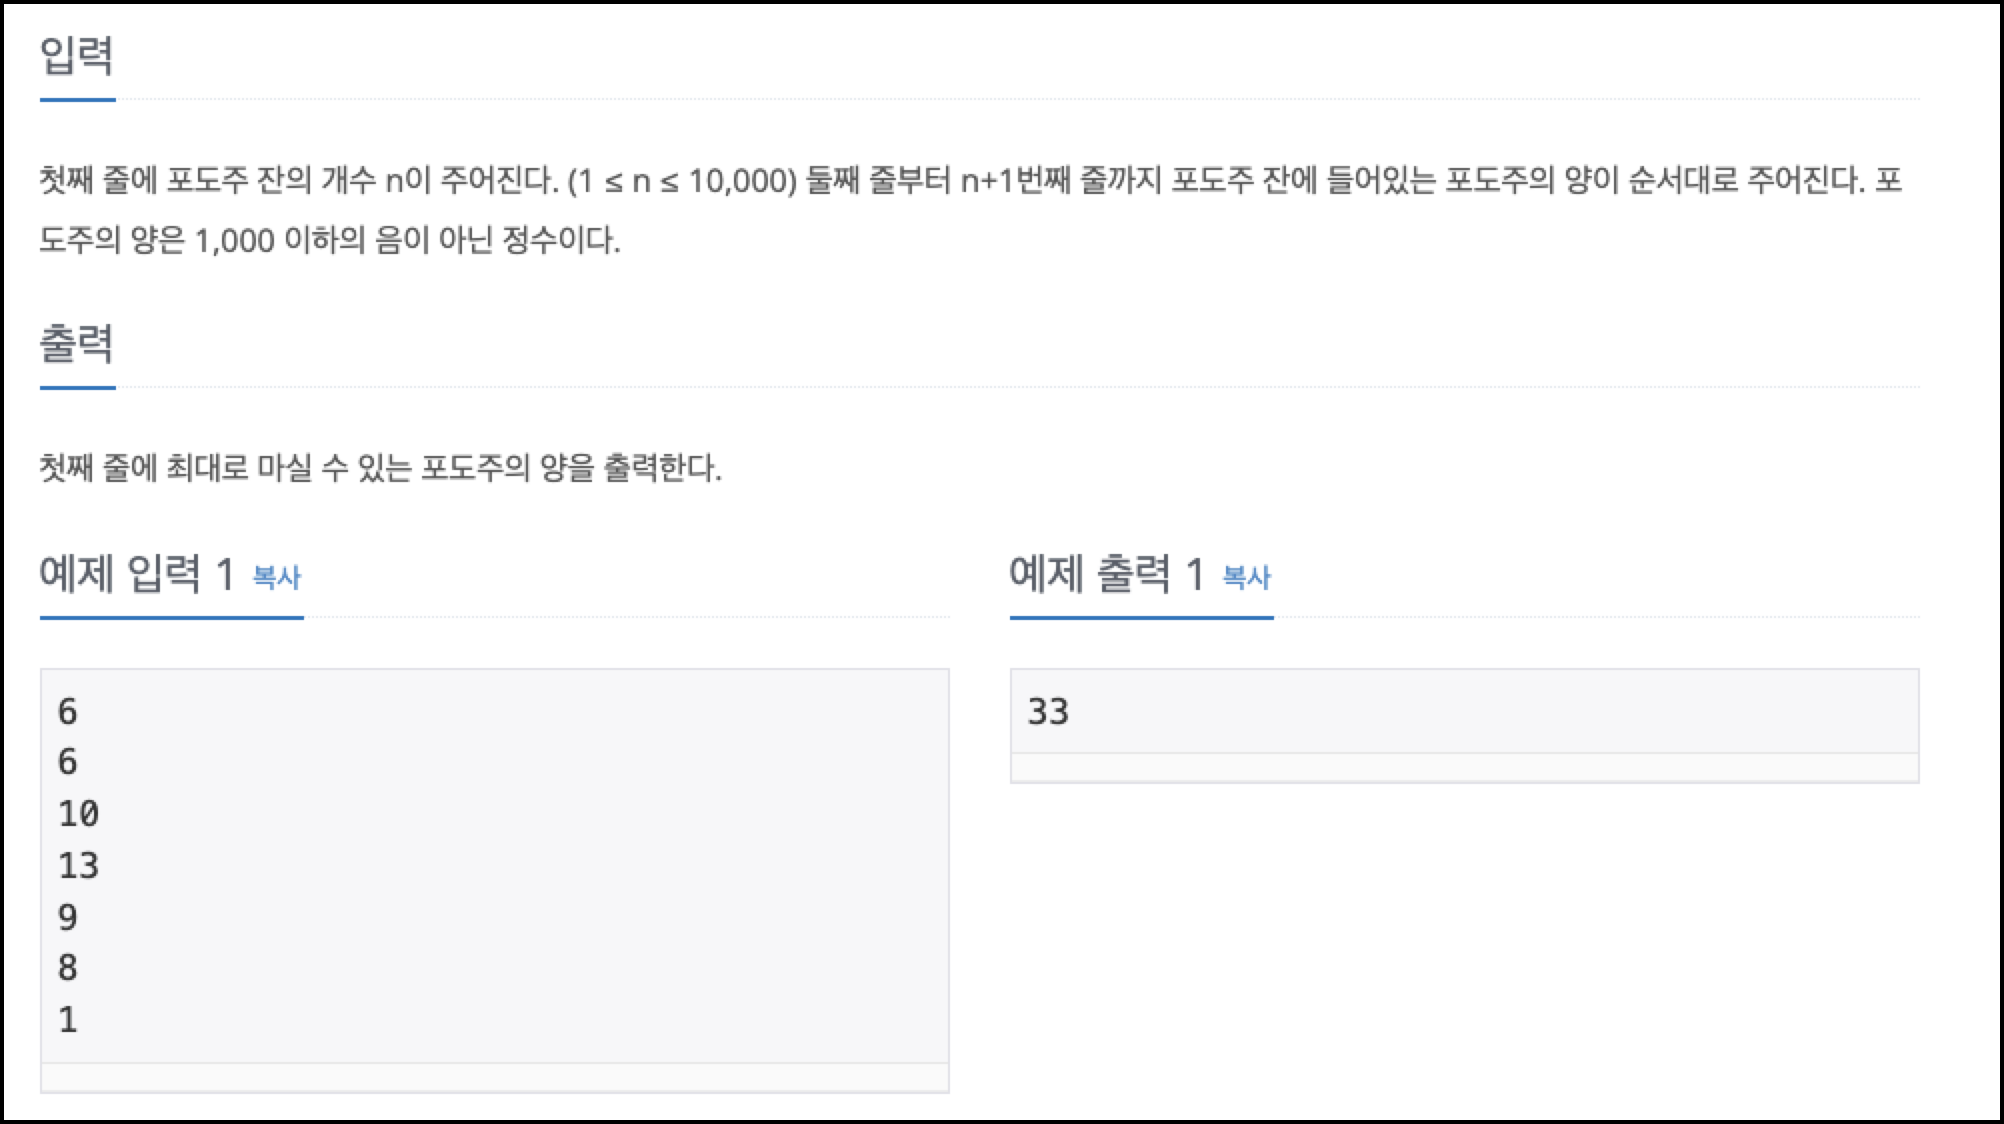
상상코딩: dp 테이블을 만들고, k인덱스에 규칙을 만족하며, k개의 잔으로 마실 수 있는 포도주 최대의 양을 기록한다

### 복습 풀이

In [ ]:
n=int(input())
g=[int(input()) for _ in range(n)]
d=[0]*n
if n<=2:
    print(sum(g))
else:
    d[0],d[1],d[2]=g[0],sum(g[:2]),max(g[0]+g[1],g[1]+g[2],g[0]+g[2])
    for i in range(3,n):
        d[i] = max(d[i-3]+g[i-1]+g[i], d[i-2]+g[i], d[i-1])
    print(max(d))

In [23]:
n=int(input())
g=[int(input()) for _ in range(n)]

6
6
10
13
9
8
1


In [25]:
d=[0]*n

In [26]:
if n<=2:
    print(sum(g))
else:
    d[0],d[1],d[2]=g[0],sum(g[:2]),max(g[0]+g[1],g[1]+g[2],g[0]+g[2])
    for i in range(3,n):
        d[i] = max(d[i-3]+g[i-1]+g[i], d[i-2]+g[i], d[i-1])

In [27]:
print(max(d))

[6, 16, 23, 28, 33, 33]

### 제출 풀이

In [142]:
dp

[0, 6, 16, 23, 28, 33, 33]

In [144]:
n=int(input())
p=[int(input()) for _ in range(n)]
dp=[0]*(n+1)
dp[1]=p[0]
if n>=2:
    dp[2]=p[0]+p[1]
    for i in range(3,n+1):
        dp[i]=max(dp[i-3]+sum(p[i-2:i]), dp[i-2]+p[i-1], dp[i-1])
print(dp[n])

1
1
1


In [160]:
n=int(input())

6


In [128]:
p=[int(input()) for _ in range(n)]
p

6
10
13
9
8
1


[6, 10, 13, 9, 8, 1]

In [185]:
dp=[0]*(n+1)
dp

p=[6, 10, 13, 9, 8, 1]

dp[1]=p[0]

In [186]:
p

[6, 10, 13, 9, 8, 1]

In [187]:
dp

[0, 6, 0, 0, 0, 0, 0]

In [188]:
if n>=2:
    dp[2]=p[0]+p[1]
    for i in range(3,n+1):
        dp[i]=max(dp[i-3]+sum(p[i-2:i]), dp[i-2]+p[i-1], dp[i-1])
        if i==4:
            break

In [189]:
dp

[0, 6, 16, 23, 28, 0, 0]

In [184]:
dp

[0, 6, 16, 23, 0, 0, 0]

In [141]:
dp[n]

33

#### 숏코딩

In [ ]:
a=[int(input())for i in range(int(input()))]
d=[0,a[0]]
for i in a[1:]:
    d=[max(d),d[0]+i,d[1]+i]
print(max(d))

In [145]:
a=[int(input())for i in range(int(input()))]
d=[0,a[0]]

6
6
10
13
9
8
1


In [190]:
a

[6, 10, 13, 9, 8, 1]

In [149]:
a[1:]

[10, 13, 9, 8, 1]

In [197]:
d=[0,a[0]]
d

[0, 6]

In [198]:
for i in a[1:]:
    d=[max(d),d[0]+i,d[1]+i]
    if i==9:
        break

In [193]:
d

[6, 10, 16]

In [196]:
d

[16, 19, 23]

In [199]:
d

[23, 25, 28]

In [200]:
a

[6, 10, 13, 9, 8, 1]

## 1463 1로 만들기
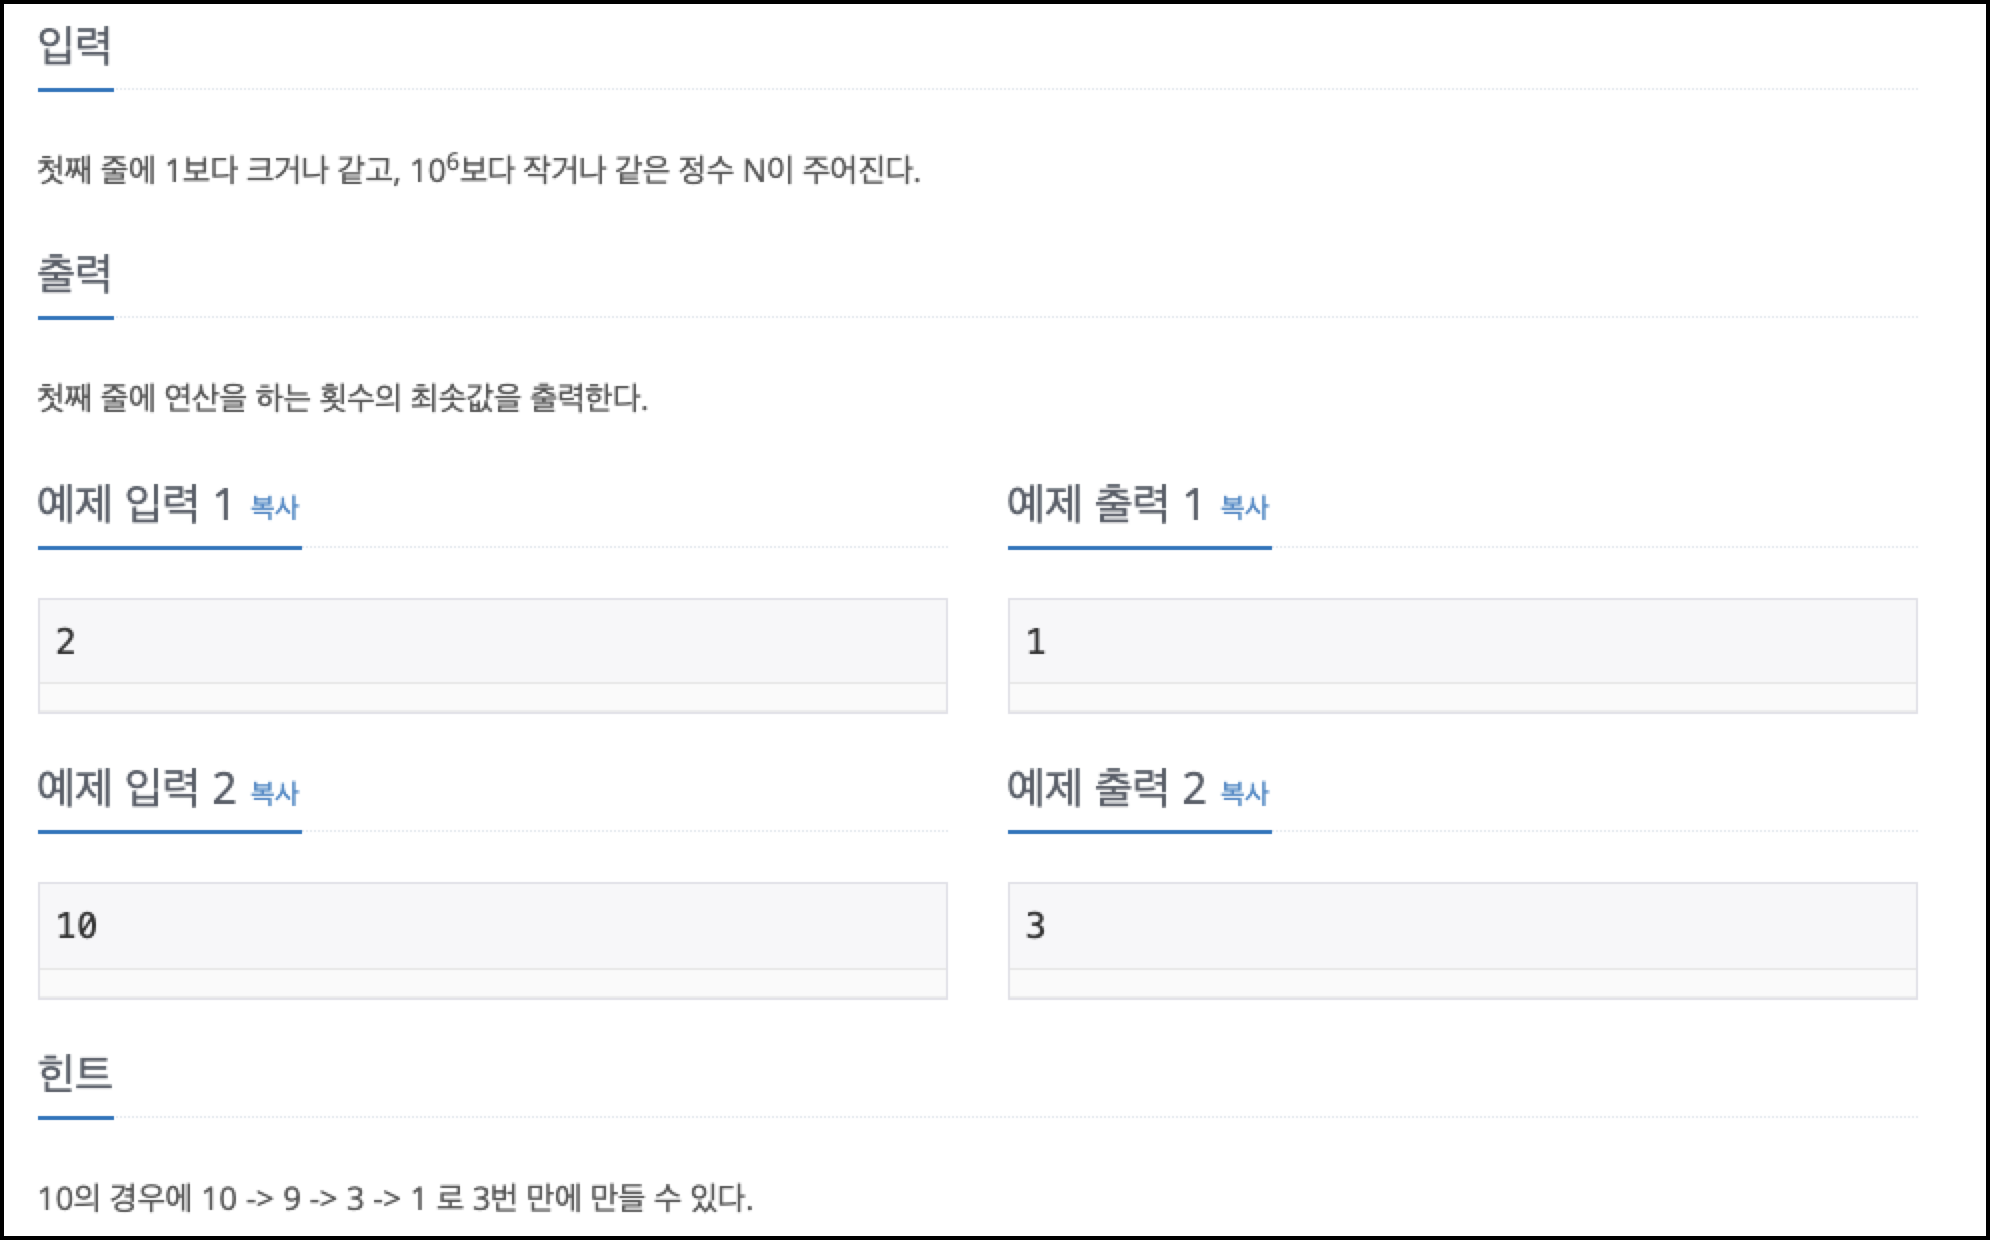
상상코딩: 주어진 수에 대해, 1이 될때까지 함수를 재귀적으로 호출하여 1이 되면 출력. 3 나누는거 부터 우선순위 주기.
-> 3으로 나누는거 우선순위 주면 안된다 -> bfs로 해보기

### 복습 풀이

In [ ]:
N=int(input())
d=[-1]+[0]*(N)
for i in range(1,N+1):
    d[i]=d[i-1]+1
    if i%3==0:
        d[i]=min(d[i],d[i//3]+1)
    if i%2==0:
        d[i]=min(d[i],d[i//2]+1)
print(d[N])

In [42]:
N=10

In [43]:
d=[-1]+[0]*(N)

In [44]:
for i in range(1,N+1):
    d[i]=d[i-1]+1
    if i%3==0:
        d[i]=min(d[i],d[i//3]+1)
    if i%2==0:
        d[i]=min(d[i],d[i//2]+1)

In [45]:
d[N]

3

상상코딩: 10에서 1이 될때 다양한 루트가 존재한다. 처음에 빨리줄어든다고 그게 정답은 또 아니다. 

In [ ]:
x=int(input())
dp={1:0}
def rec(n):
    if n in dp.keys():
        return dp[n]
    if (n%3==0) and (n%2==0):
        dp[n]=min(rec(n//3)+1, rec(n//2)+1)
    elif n%3==0:
        dp[n]=min(rec(n//3)+1, rec(n-1)+1)
    elif n%2==0:
        dp[n]=min(rec(n//2)+1, rec(n-1)+1)
    else:
        dp[n]=rec(n-1)+1
    return dp[n]
print(rec(x))

### 탑다운 dp 풀이(재귀 사용)

In [67]:
x = int(input())

dp = {}
dp[1] = 0
ccnt=0
def rec(x):
    global ccnt
    if x in dp:
        return dp[x]
    if(x%3 == 0 and x%2 == 0):
        dp[x] = min(rec(x//2),rec(x//3))+1
    elif x%3 == 0:
        dp[x]=min(rec(x-1),rec(x//3))+1
    elif x%2 == 0:
        dp[x]=min(rec(x-1),rec(x//2))+1
    else:
        dp[x]=rec(x-1)+1
    ccnt+=1
#     print(f"{x=}, {dp=}")
    return dp[x]

print(rec(x))

1000
9


In [68]:
## 약간의 차이로인해 메모리초과나는 풀이
import sys
sys.setrecursionlimit(10**9)
x = int(input())

dp = {}
dp[1] = 0
cnt=0
def rec(x):
    global cnt
    if x in dp:
        return dp[x]
    if(x%3 == 0):
        dp[x] = min(rec(x-1),rec(x//3))+1
    elif(x%2 == 0):
        dp[x] = min(rec(x-1),rec(x//2))+1
    else:
        dp[x] = rec(x-1)+1
    cnt+=1
    print(f"{x=}, {dp=}")
    return dp[x]
print(rec(x))

10
x=2, dp={1: 0, 2: 1}
x=3, dp={1: 0, 2: 1, 3: 1}
x=4, dp={1: 0, 2: 1, 3: 1, 4: 2}
x=5, dp={1: 0, 2: 1, 3: 1, 4: 2, 5: 3}
x=6, dp={1: 0, 2: 1, 3: 1, 4: 2, 5: 3, 6: 2}
x=7, dp={1: 0, 2: 1, 3: 1, 4: 2, 5: 3, 6: 2, 7: 3}
x=8, dp={1: 0, 2: 1, 3: 1, 4: 2, 5: 3, 6: 2, 7: 3, 8: 3}
x=9, dp={1: 0, 2: 1, 3: 1, 4: 2, 5: 3, 6: 2, 7: 3, 8: 3, 9: 2}
x=10, dp={1: 0, 2: 1, 3: 1, 4: 2, 5: 3, 6: 2, 7: 3, 8: 3, 9: 2, 10: 3}
3


In [69]:
cnt

9

In [70]:
ccnt

71

In [72]:
x = int(input())
dp = {1:0}
def rec(x):
    if x in dp:
        return dp[x]
    if(x%3 == 0 and x%2 == 0):
        dp[x] = min(rec(x//2),rec(x//3))+1
    elif x%3 == 0:
        dp[x]=min(rec(x-1),rec(x//3))+1
    elif x%2 == 0:
        dp[x]=min(rec(x-1),rec(x//2))+1
    else:
        dp[x]=rec(x-1)+1
    return dp[x]
print(rec(x))

10
3


In [46]:
ccnt

9

In [5]:
dp

{1: 0, 2: 1, 3: 1, 6: 2, 7: 3, 4: 2, 8: 3, 9: 2, 5: 3, 10: 3}

In [3]:
dp

{1: 0, 2: 1, 3: 1, 4: 2, 5: 3, 6: 2, 7: 3, 8: 3, 9: 2, 10: 4}

In [ ]:
import sys
sys.setrecursionlimit(10**9)
X=int(input())
d=[0]*(X+1)
def sol(x):
    if x<2:
        return 0
    if d[x]>0:
        return d[x]
    result = sol(x-1)+1
    if x%3==0:
        result = min(result,sol(x//3)+1)
    if x%2==0:
        result = min(result,sol(x//2)+1)
    d[x]=result
    return d[x]
print(sol(X))

100000


### 보텀업 dp 풀이 (for문 사용)

In [ ]:
x=int(input()) # 수 입력받기
# d[k]는 정수k에 대해 1로 만들때 필요한 최소 횟수가 저장된다.
d=[0]*(x+1) # 1-based
for i in range(2,x+1): # 2부터 x까지 반복
    d[i]=d[i-1]+1 # 1을 빼는 연산 1회 더하기
    if i%2==0:
        d[i]=min(d[i],d[i//2]+1)
    if i%3==0:
        d[i]=min(d[i],d[i//3]+1)
print(d[x])

In [235]:
x=int(input())

10


In [236]:
x

10

In [237]:
# d[k]는 정수k에 대해 1로 만들때 필요한 최소 횟수가 저장된다.
d=[0]*(x+1)

In [238]:
for i in range(2,x+1): # 2부터 x까지 반복
    d[i]=d[i-1]+1 # 1을 빼는 연산 1회 더하기
    if i%2==0:
        d[i]=min(d[i],d[i//2]+1)
    if i%3==0:
        d[i]=min(d[i],d[i//3]+1)

In [239]:
d

[0, 0, 1, 1, 2, 3, 2, 3, 3, 2, 3]

In [240]:
d[10]

3

### 숏코딩 풀이

In [66]:
N = int(input())

def dp(n):
    if n < 2:
        return 0
    else:
        return min(dp(n//2) + n%2, dp(n//3) + n%3) + 1
print(dp(N))

10000000
22


### bfs 풀이

In [ ]:
from collections import deque
x=int(input())
Q=deque([x])
visited=[0]*(x+1)
while Q:
    c=Q.popleft()
    if c==1:
        break
    if c%3==0 and visited[c//3]==0:
        Q.append(c//3)
        visited[c//3]=visited[c]+1
    if c%2==0 and visited[c//2]==0:
        Q.append(c//2)
        visited[c//2]=visited[c]+1
    if visited[c-1]==0:
        Q.append(c-1)
        visited[c-1]=visited[c]+1
print(visited[1])

In [201]:
X=int(input())
X

10


10

In [207]:
from collections import deque

In [230]:
Q=deque([X])

In [219]:
visited=[0]*(X+1)

In [231]:
visited=[0,0,0]

In [232]:
while Q:
    c=Q.popleft()
    if c==1:
        break
    if c%3==0 and visited[c//3]==0:
        Q.append(c//3)
        visited[c//3]=visited[c]+1
    if c%2==0 and visited[c//2]==0:
        Q.append(c//2)
        visited[c//2]=visited[c]+1
    if visited[c-1]==0:
        Q.append(c-1)
        visited[c-1]=visited[c]+1
    print(f"{c=}, {visited=}")

c=2, visited=[0, 1, 0]


## 2579 계단 오르기
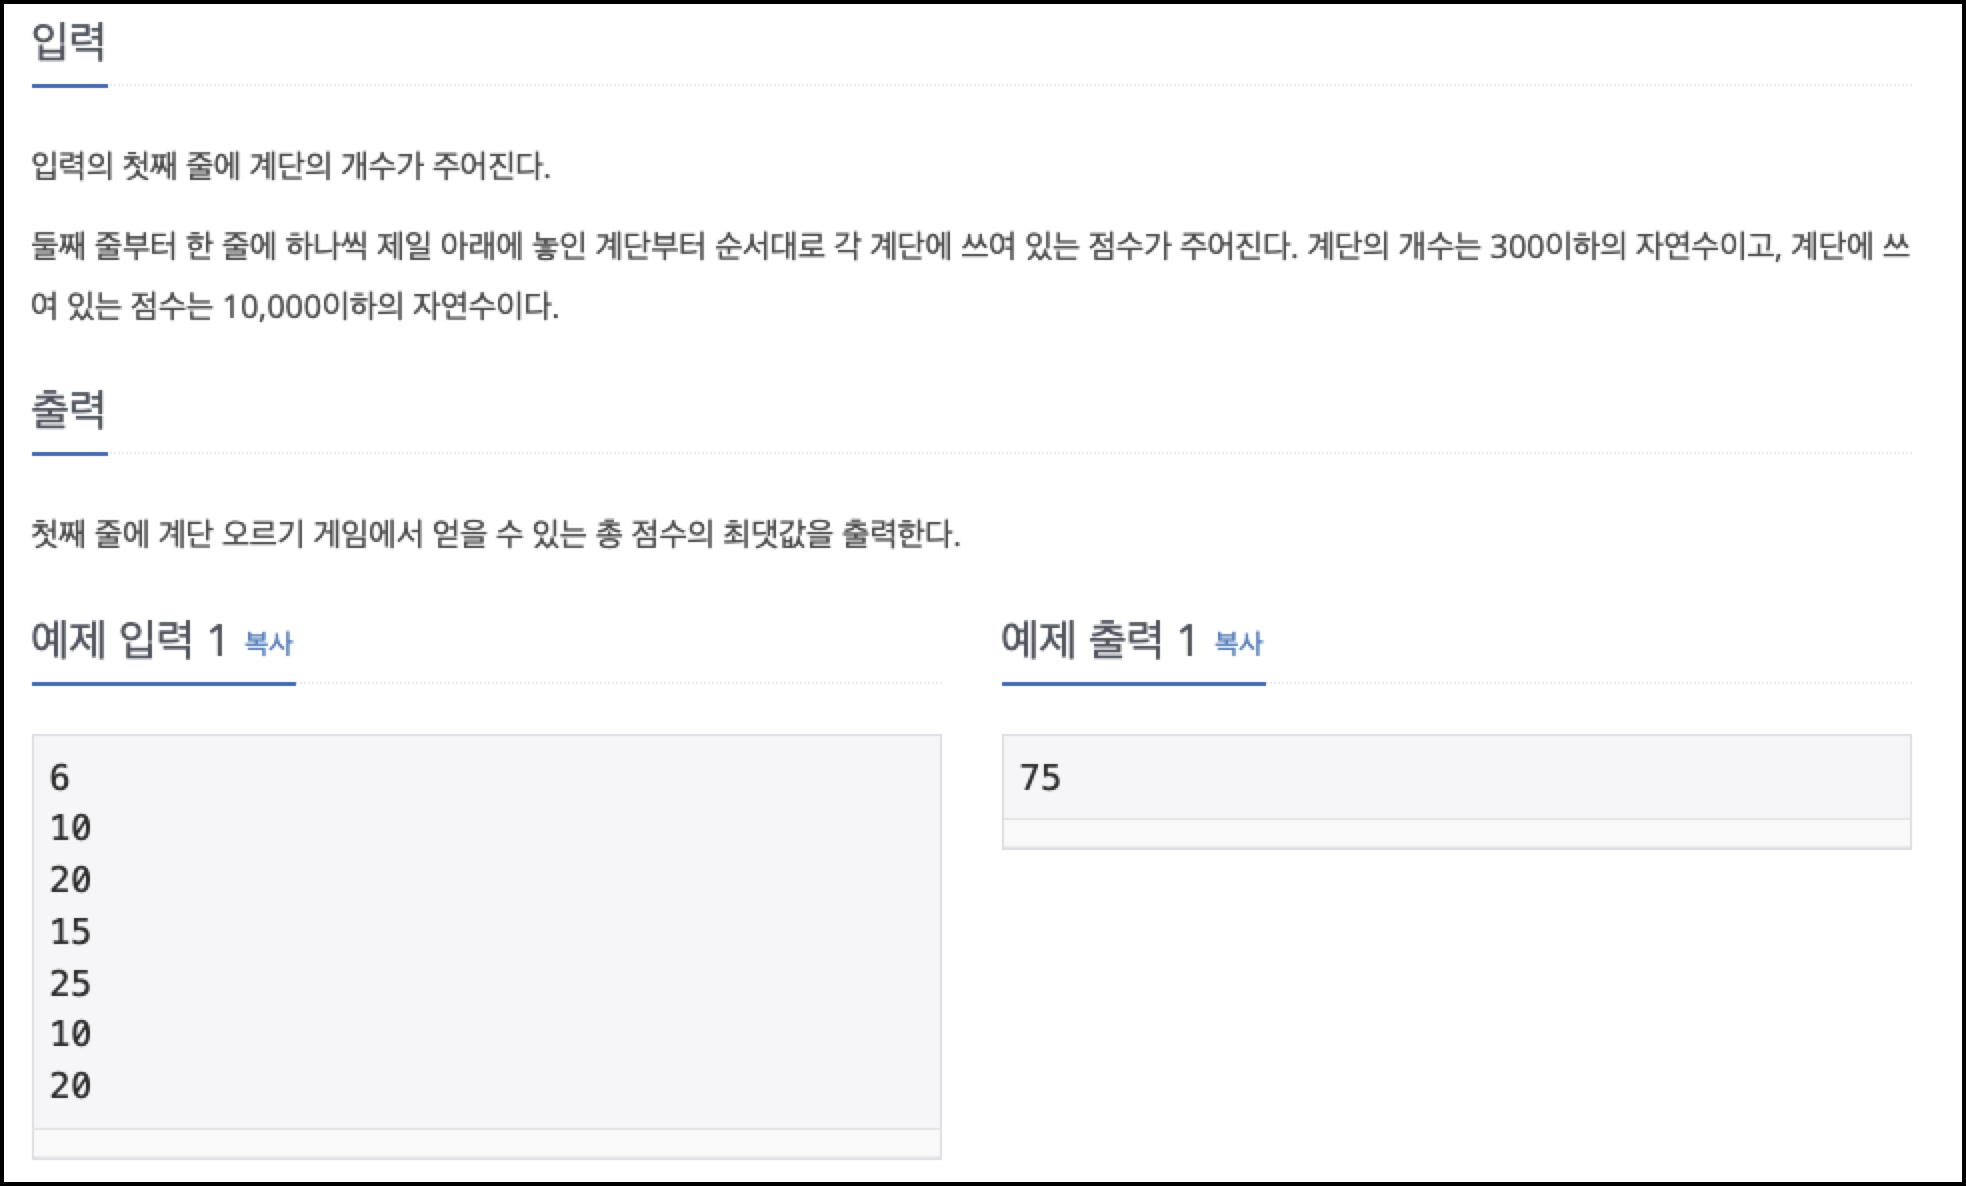

<div>
    <img src=attachment:image.png width=500>
</div>
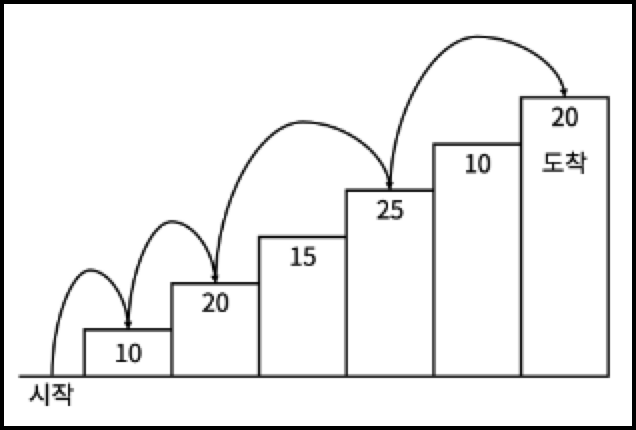

### 복습 풀이

In [22]:
N=int(input())
S=[int(input()) for _ in range(N)]
d=[0]*(N+1)
if N<=2:
    print(sum(S))
else:
    d[0],d[1],d[2]=S[0],S[0]+S[1],max(S[:2])+S[2]
    for i in range(3,N):
        d[i]=max(d[i-3]+S[i-1]+S[i],d[i-2]+S[i])
    print(d[N-1])

3
10
20
30
40


In [20]:
d

[10, 30, 35, 55, 65, 75, 0]

In [12]:
N=6
S=[10,20,15,25,10,20]

In [13]:
d=[0]*(N+1)

In [15]:
if N<=2:
    print(sum(S))
else:
    d[0],d[1]=S[0],S[0]+S[1]
    for i in range(2,N):
        d[i]=max(d[i-2]+S[i],d[i-1])

In [18]:
d[N-1]

75

### 제출 풀이

In [255]:
n=int(input()) # 계단 개수
s=[int(input()) for _ in range(n)] # 계단 리스트
dp=[0]*(n) # dp 리스트
if len(s)<=2: # 계단이 2개 이하일땐 그냥 다 더해서 출력
    print(sum(s))
else: # 계단이 3개 이상일 때
    dp[0]=s[0] # 첫째 계단 수동 계산
    dp[1]=s[0]+s[1] # 둘째 계단까지 수동 계산
    for i in range(2,n): # 3번째 계단 부터 dp 점화식 이용해서 최대값 구하기
        dp[i]=max(dp[i-3]+s[i-1]+s[i], dp[i-2]+s[i])
    print(dp[-1])

6
10
20
15
25
10
20
75


In [256]:
n,s,dp

(6, [10, 20, 15, 25, 10, 20], [10, 30, 35, 55, 65, 75])

In [169]:
n=int(input())
s=[int(input()) for _ in range(n)]
dp=[0]*(n+1)
if len(s)<=2:
    print(sum(s))
else:
    dp[1]=s[0]
    dp[2]=s[0]+s[1]
    for i in range(3,n-1):
        dp[i]=max(dp[i-3]+s[i-2]+s[i-1], dp[i-2]+s[i-1])
    print(max(dp[-4]+s[-2]+s[-1],dp[-3]+s[-1]))

3
1
3
1
4


In [141]:
s

[100, 100, 1, 1, 100, 100, 1, 1, 1000, 1000, 1000]

In [166]:
dp

[0, 100, 200, 101, 201, 301, 301, 302, 303, 1302, 0, 0]

In [160]:
dp

[0, 6, 12, 12, 13, 0, 0]

In [155]:
dp

[0, 1, 3, 0]

In [145]:
dp

[0, 0, 0, 2, 101, 200, 200, 201, 1201, 0, 0]

[1000, 1000]

In [139]:
dp

[1000, 2000, 2000, 2001, 2002, 2101, 2201, 2201, 2202, 2302, 2401]

In [116]:
s

[1, 1, 200, 100, 1, 1, 200, 100, 1, 1, 1]

In [85]:
v

[1, 2, 1, 2, 0]

In [86]:
dp

[10, 30, 40, 80, 80]

#### 숏코딩 연구

In [194]:
d[:]

[0, 0, 0, 1, 3, 5, 0, 0, 0, 0]

In [189]:
x,b,d=int(input()),0,[0]*303
for i in range(3,x+3):
    b,d[i]=(n:=int(input())),max(d[i-3]+b,d[i-2])+n
print(d[x+2])

3
1
2
3
5


In [ ]:
d=[0]*305
x,b=int(input()),0
for i in range(3,x+3):
    n=int(input())
    d[i] = max(d[i-3]+b,d[i-2])+n
    b=n
print(d[x+2])

In [185]:
n = int(input())
a = [0]*3
for i in range(n):
    m = int(input())
    a = [a[1]+m, a[2]+m, max(a[0],a[1])]
print(max(a[0],a[1]))

6
6
6
1
1
6
6
19


## 1912 연속합
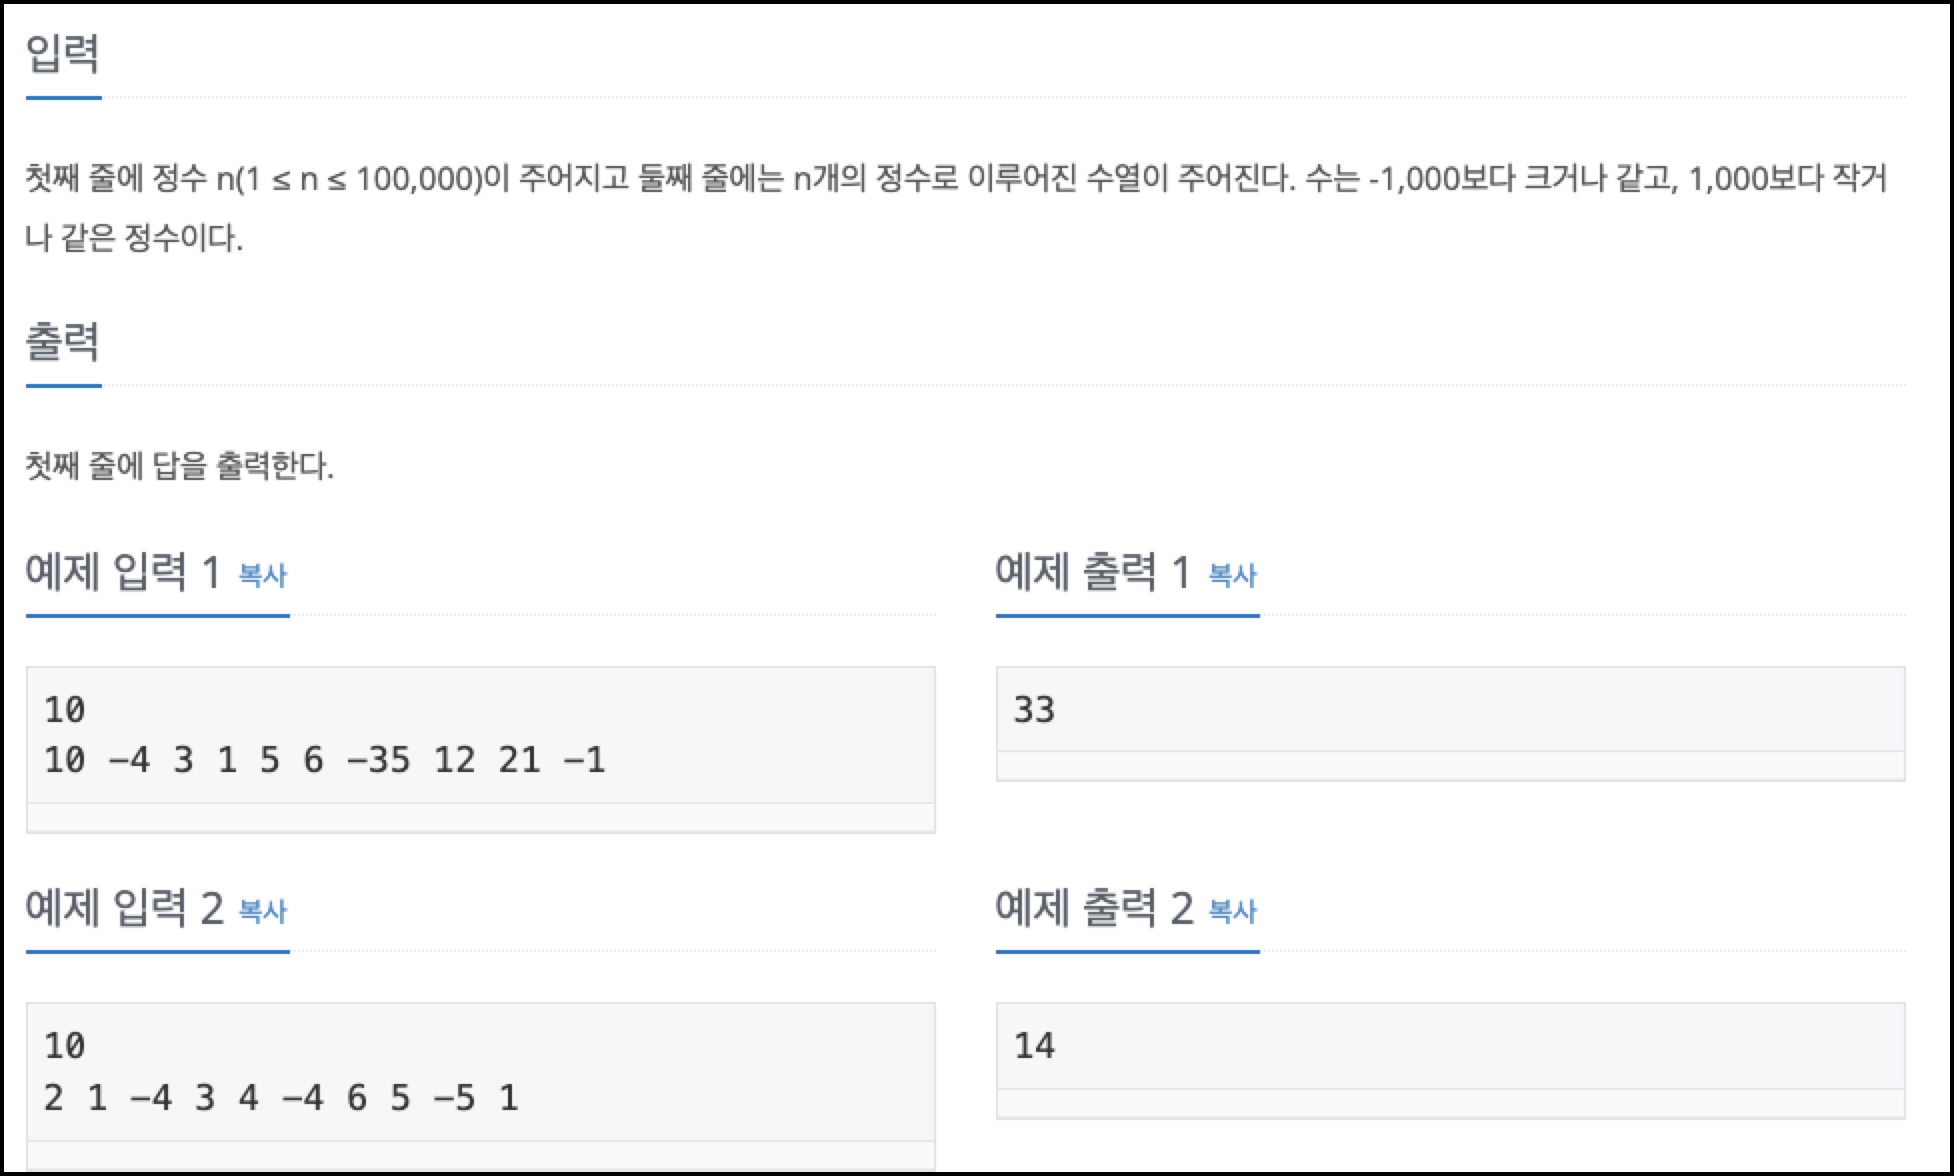


https://www.acmicpc.net/problem/1912

### 복습 풀이
    문제: 연속된 몇 개의 수를 선택해서 구할 수 있는 합 중 가장 큰 합
    n개의 정수, 수는 -1000 ~ 1000 정수
    조건
    1. 수는 한 개 이상 선택


    핵심 알고리즘: k번째 값이 k 일때, max(d[k-1]+k,k)를 하는게 핵심이다.
    d[k-1] : k-1번을 포함한 최대값이고, 현재 k에서 k를 포함했을 때보다 k가 더크면 k부터 시작하는게 더 큰값을 것이다. 중간에 마이너스 값들을 포함하더라도, d에서 i번째는 i를 포함하는 최대값을 계산하기 때문에 전체에서 max를 구해주면 된다.

In [195]:
n=int(input())
l=[*map(int,input().split())]
d=[-1001]*(n+1)
for i in range(1,n+1):
    d[i]=max(d[i-1]+l[i-1],l[i-1])
print(max(d))

1
-1
-1


In [187]:
n=10
l=[*map(int,"10 -4 3 1 5 6 -35 12 21 -1".split())]

In [188]:
n,l

(10, [10, -4, 3, 1, 5, 6, -35, 12, 21, -1])

In [190]:
d=[-1001]*(n+1)

In [192]:
for i in range(1,n+1):
    d[i]=max(d[i-1]+l[i-1],l[i-1])

In [193]:
print(max(d))

[-1001, 10, 6, 9, 10, 15, 21, -14, 12, 33, 32]

### 제출 풀이

In [257]:
input() # n은 쓰지 않으니 그냥 input만 받기
s=[*map(int,input().split())] # 수열을 리스트로 저장
d=[s[0]] # dp 리스트
for i in s[1:]: # s의 2번째 원소부터 반복
    d.append(max(d[-1]+i,i)) # 핵심 코드
print(max(d)) # 최대값 출력

10
10 -4 3 1 5 6 -35 12 21 -1
33


In [259]:
print(s)
print(d)

[10, -4, 3, 1, 5, 6, -35, 12, 21, -1]
[10]


In [195]:
n=int(input())

10


In [202]:
s=[*map(int,input().split())]

10 -4 3 1 5 6 -35 12 21 -1


In [203]:
s

[10, -4, 3, 1, 5, 6, -35, 12, 21, -1]

In [213]:
dp=[-1001]*n

In [214]:
dp[0]=s[0]

In [216]:
for i in range(1,n):
    dp[i]=max(dp[i-1]+s[i], s[i])

In [217]:
print(max(dp))

[10, 6, 9, 10, 15, 21, -14, 12, 33, 32]

## 12919 A와 B2
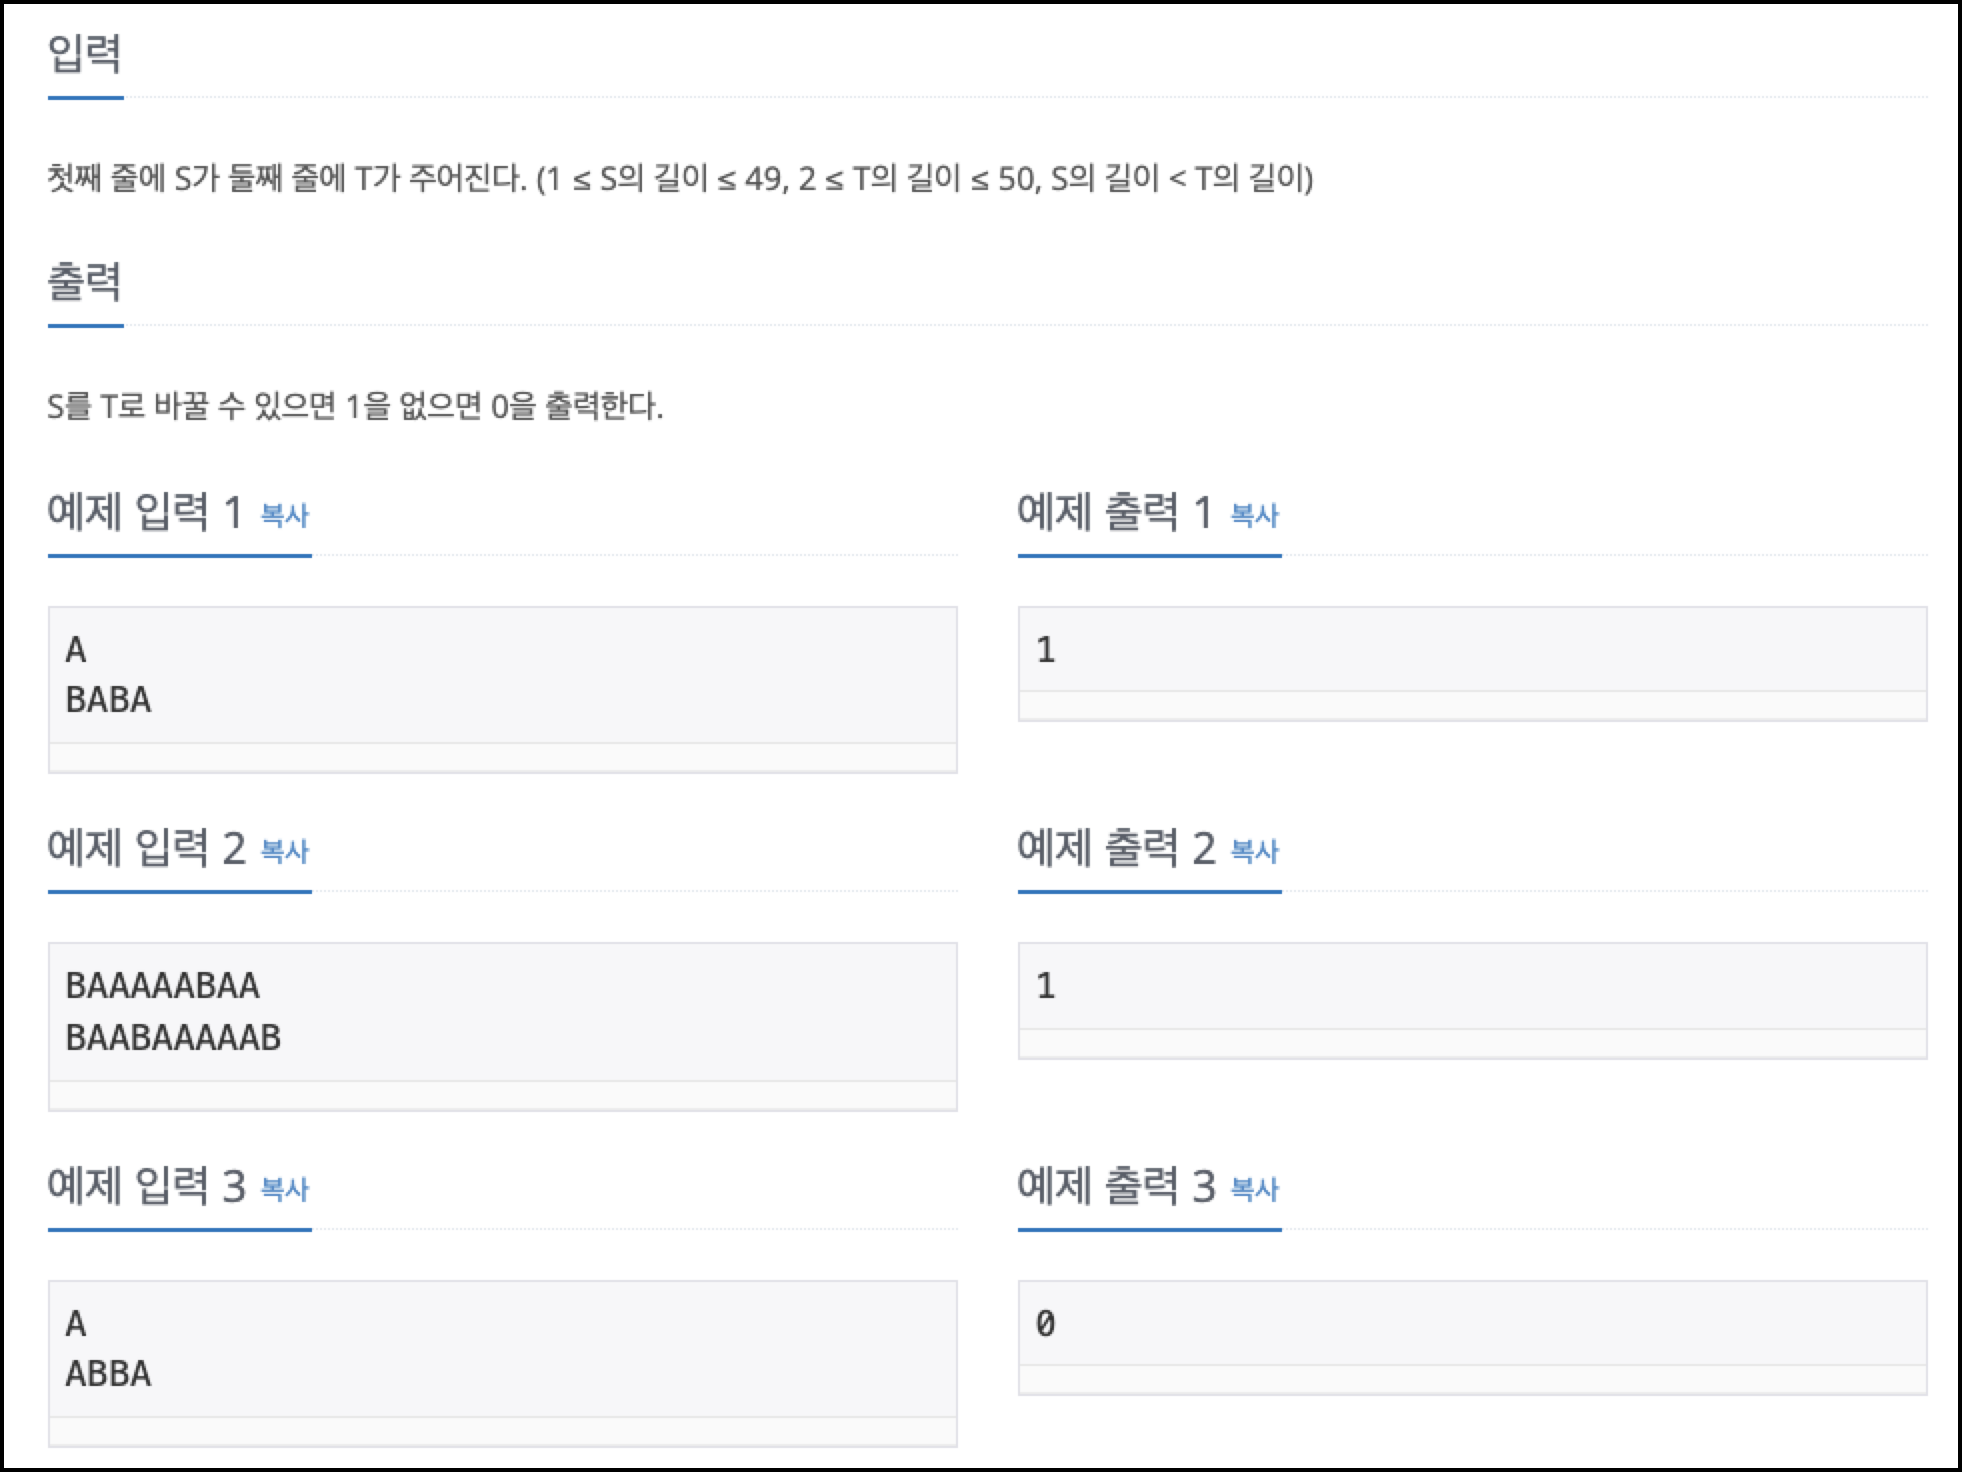

### 제출 풀이

In [260]:
import sys
S=list(input())
T=list(input())
def dfs(t): # 문자열 T를 입력받아
    if t==S:
        print(1)
        sys.exit()
    if len(t)==0:
        return 0
    if t[-1]=='A': # 마지막이 A이면 
        dfs(t[:-1]) # 제거해서 재귀
    if t[0]=='B': # 처음이 B이면
        dfs(t[1:][::-1]) # B제거하고, 뒤집어서 재귀
dfs(T)
print(0)

B
ABBA
0


In [261]:
print(S)
print(T)

['B']
['A', 'B', 'B', 'A']


In [231]:
S,T

(['A'], ['B', 'A', 'B', 'A'])

In [227]:
import sys

In [229]:
print(1)
sys.exit()
print(1)

1


SystemExit: 

In [243]:
def dfs(t):
    if t==S:
        print(1)
        sys.exit()
    if len(t)==0:
        return 0
    if t[-1]=='A':
        dfs(t[:-1])
    if t[0]=='B':
        dfs(t[1:][::-1])

dfs(T)
print(0)

### 12904 A와 B
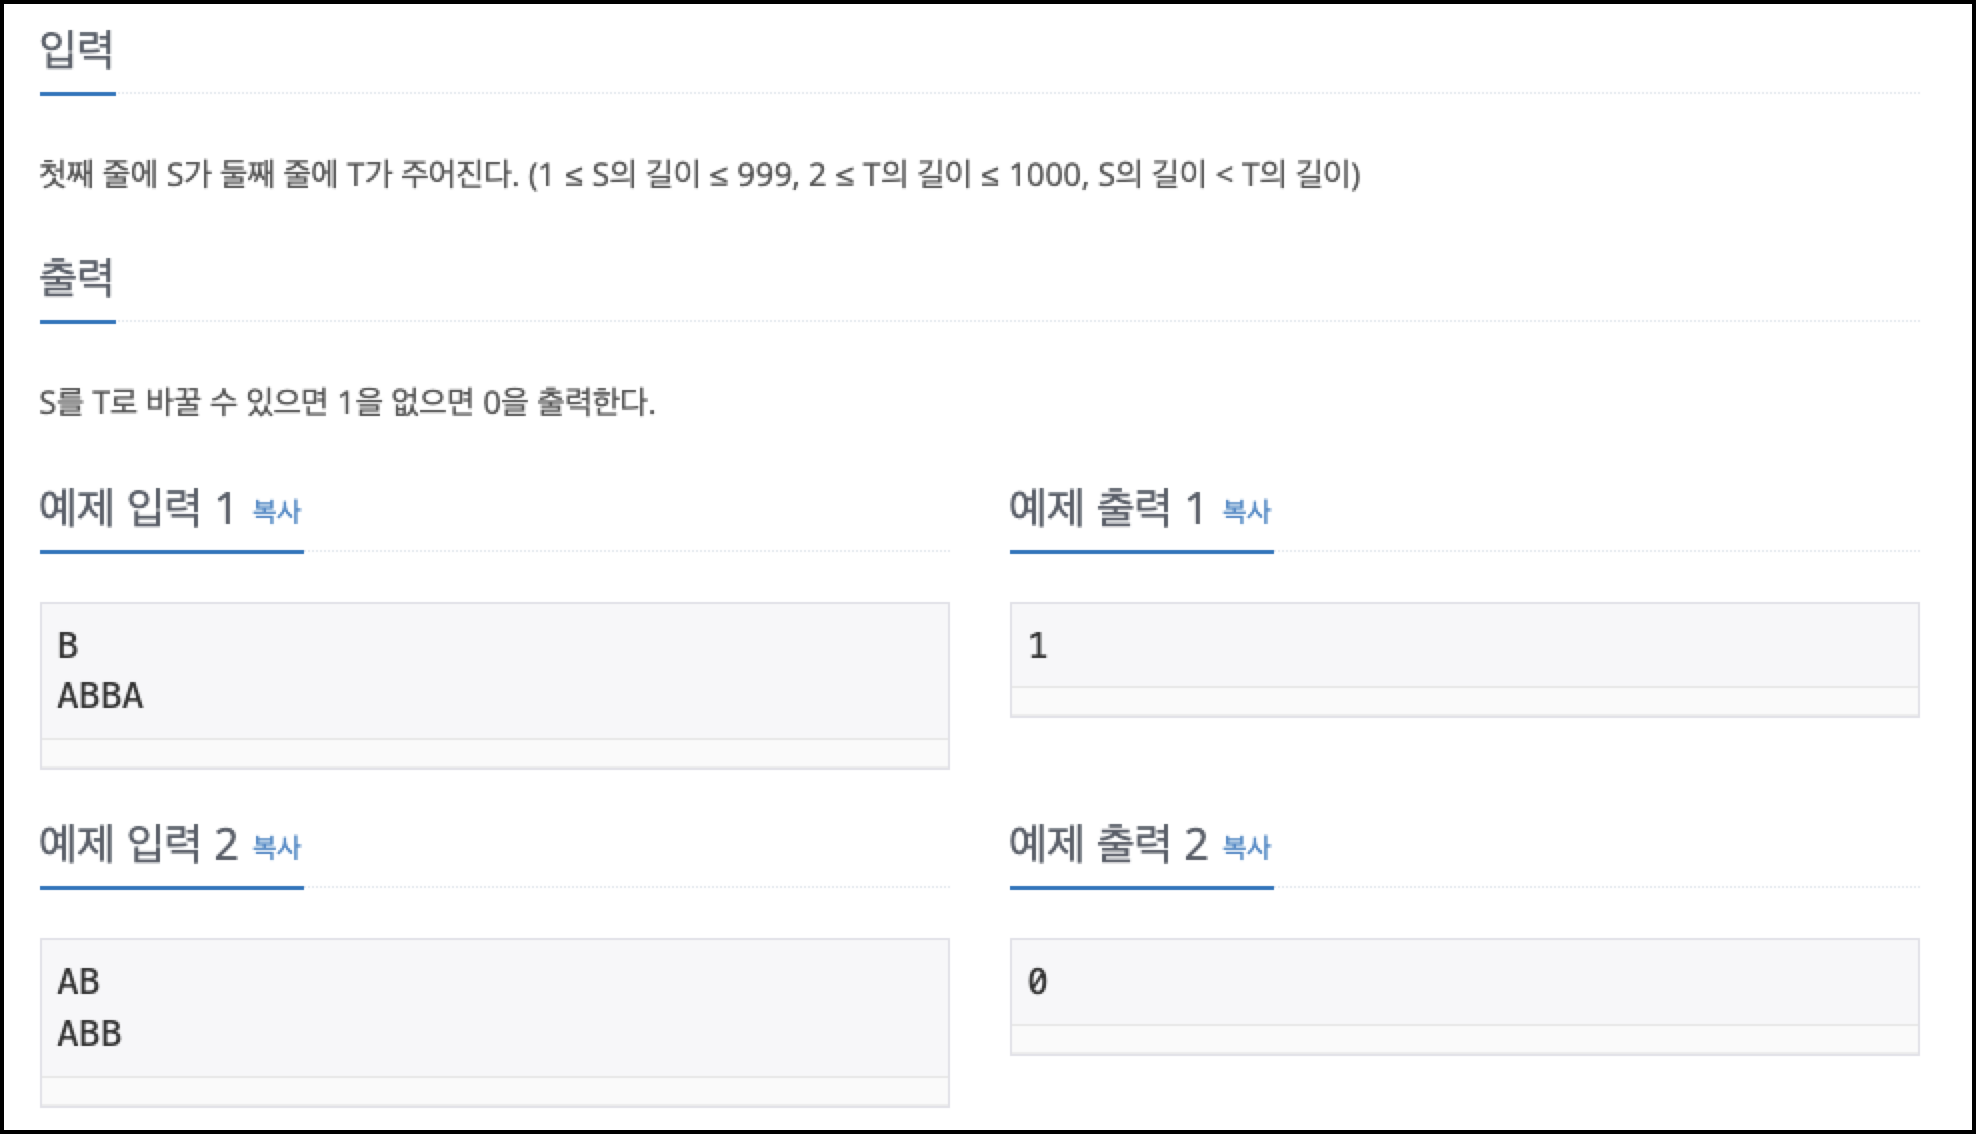

In [248]:
S,T

(['B', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A'],
 ['B', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'B'])

In [249]:
T[:-1]

['B', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A']

In [251]:
import sys
sys.setrecursionlimit(10**6) # 재귀 호출 리밋 올리기
S=list(input())
T=list(input())
def dfs(t):
    if t==S:
        print(1)
        sys.exit()
    if len(t)==0:
        return 0
    if t[-1]=='A': # 마지막이 A이면
        dfs(t[:-1]) # 제거하고, 재귀
    if t[-1]=='B': # 마지막이 B이면
        dfs(t[:-1][::-1]) # 제거하고, 뒤집어서 재귀
dfs(T)
print(0)

AB
ABB
0


In [263]:
import sys
sys.setrecursionlimit(10**6) # 재귀 호출 리밋 올리기
S=list(input())
T=list(input())

B
ABBA


In [264]:
print(S)
print(T)

['B']
['A', 'B', 'B', 'A']
